In [ ]:
# ============================================================================
# FIX: Get train.csv into the right location
# ============================================================================

import os
import shutil
import subprocess

os.chdir('/content/drive/MyDrive/ClaimSeverity-NN-Project')

print("="*60)
print("LOCATING TRAIN.CSV")
print("="*60)

# Search for train.csv
result = subprocess.run(
    ['find', '/content', '/content/drive/MyDrive', '-name', 'train.csv', '-type', 'f'],
    capture_output=True,
    text=True,
    timeout=30
)

if result.stdout:
    # Found it! Copy to project
    found_path = result.stdout.strip().split('\n')[0]
    print(f"✅ Found at: {found_path}")

    dest = 'data/train.csv'
    os.makedirs('data', exist_ok=True)
    shutil.copy(found_path, dest)
    print(f"✅ Copied to: {dest}")

    # Verify
    if os.path.exists(dest):
        size = os.path.getsize(dest) / (1024*1024)
        print(f"✅ File size: {size:.2f} MB")
        print("✅ Ready to continue!")

else:
    print("❌ train.csv not found automatically")
    print("\nPlease use one of these options:")
    print("\n1. Upload from Kaggle (recommended):")
    print("   - Download from: https://www.kaggle.com/c/allstate-claims-severity/data")
    print("   - Use the upload code below")
    print("\n2. Upload from your computer:")

    from google.colab import files
    print("\nUploading train.csv...")
    uploaded = files.upload()

    if 'train.csv' in uploaded:
        os.makedirs('data', exist_ok=True)
        shutil.move('train.csv', 'data/train.csv')
        print("✅ File uploaded successfully!")

print("="*60)

LOCATING TRAIN.CSV
✅ Found at: /content/drive/MyDrive/ClaimSeverity-NN-Project/train.csv
✅ Copied to: data/train.csv
✅ File size: 66.78 MB
✅ Ready to continue!


PHASE 4: SHAP INTERPRETABILITY ANALYSIS

1. Installing SHAP...
✅ SHAP installed

2. Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Working directory: /content/drive/MyDrive/ClaimSeverity-NN-Project

3. Importing libraries...
✅ All libraries imported
SHAP version: 0.50.0

LOADING DATA
✅ Raw data loaded: (188318, 132)
Categorical features: 116
Continuous features: 14
✅ Initial test set: (37664, 130)

LOADING SAVED MODEL
Loading XGBoost model...
✅ XGBoost loaded!

Aligning features to model...
  Model expects: 128 features
  Data has: 130 features
✅ Features aligned: (37664, 128)

Verifying model...
✅ XGBoost works! Sample predictions: [7.3236513 7.094381  8.081627 ]

🎉 Model loaded and ready for SHAP analysis!

SHAP ANALYSIS: XGBOOST
Using sample size: 1000

Creating SHAP TreeExplainer...
✅ Explainer created

Calculating SHAP values (1-2 minutes)...
✅ SHAP values calculated! Shape

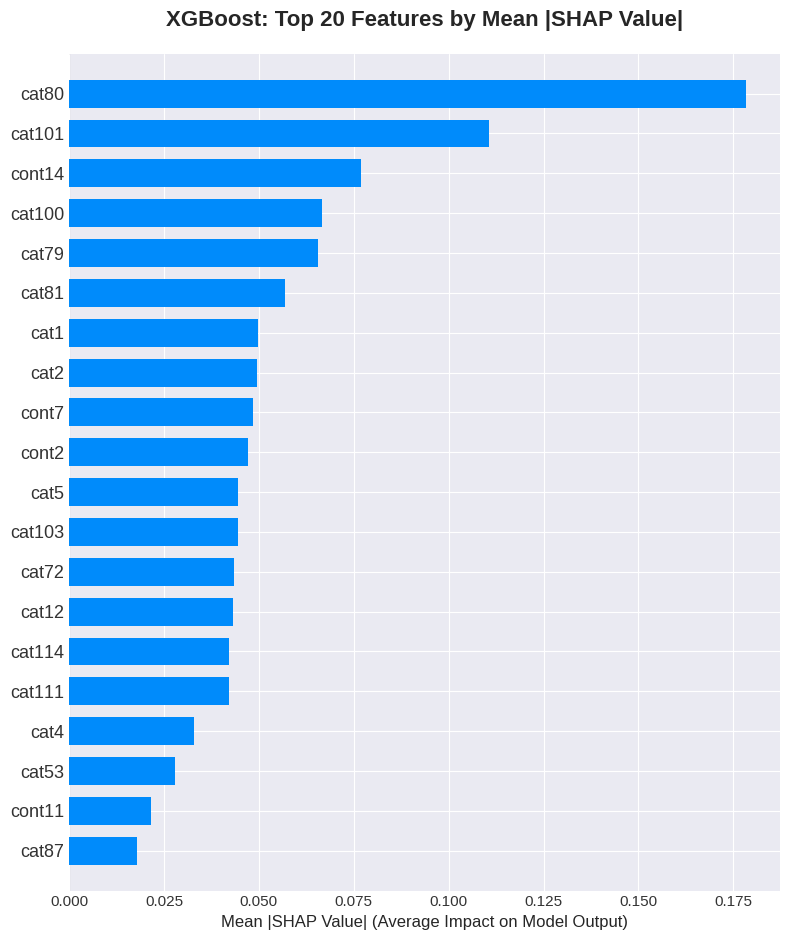

✅ Saved: shap_global_importance.png

📊 Top 10 Most Important Features:
80. cat80     : 0.1784
101. cat101    : 0.1107
128. cont14    : 0.0769
100. cat100    : 0.0668
79. cat79     : 0.0654
81. cat81     : 0.0568
 1. cat1      : 0.0499
 2. cat2      : 0.0494
123. cont7     : 0.0484
118. cont2     : 0.0471

--------------------------------------------------------------------------------
4.2: Creating SHAP Beeswarm Plot...
--------------------------------------------------------------------------------


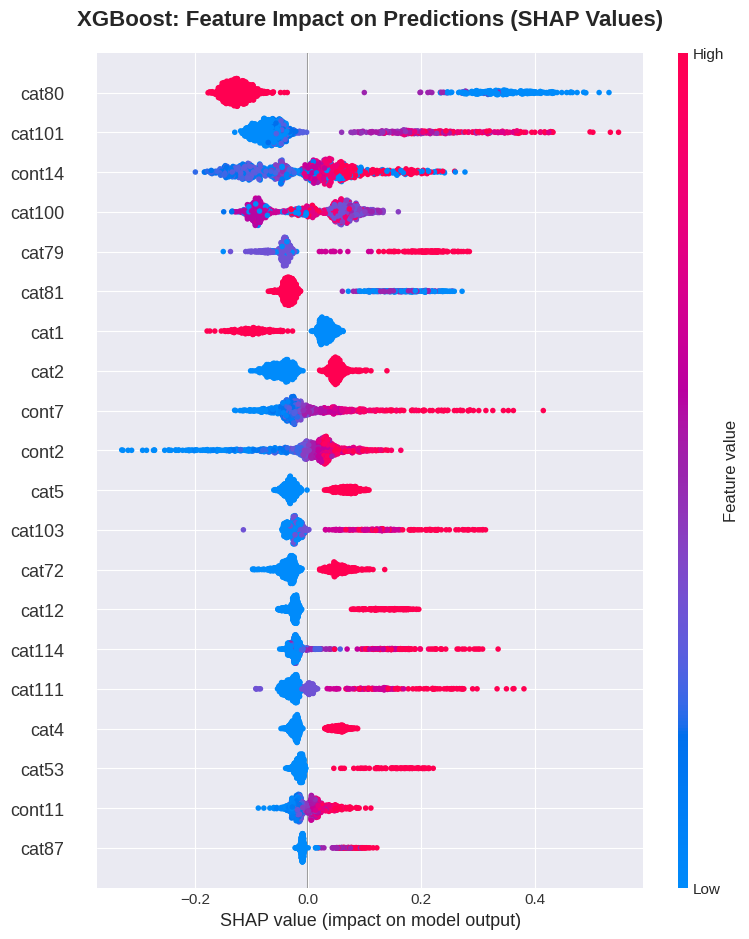

✅ Saved: shap_beeswarm.png

--------------------------------------------------------------------------------
4.3: Creating Waterfall Plots for Individual Predictions...
--------------------------------------------------------------------------------
Selected examples:
  High loss:   $26310.80
  Median loss: $6627.54
  Low loss:    $137.78

Creating waterfall for HIGH loss claim...


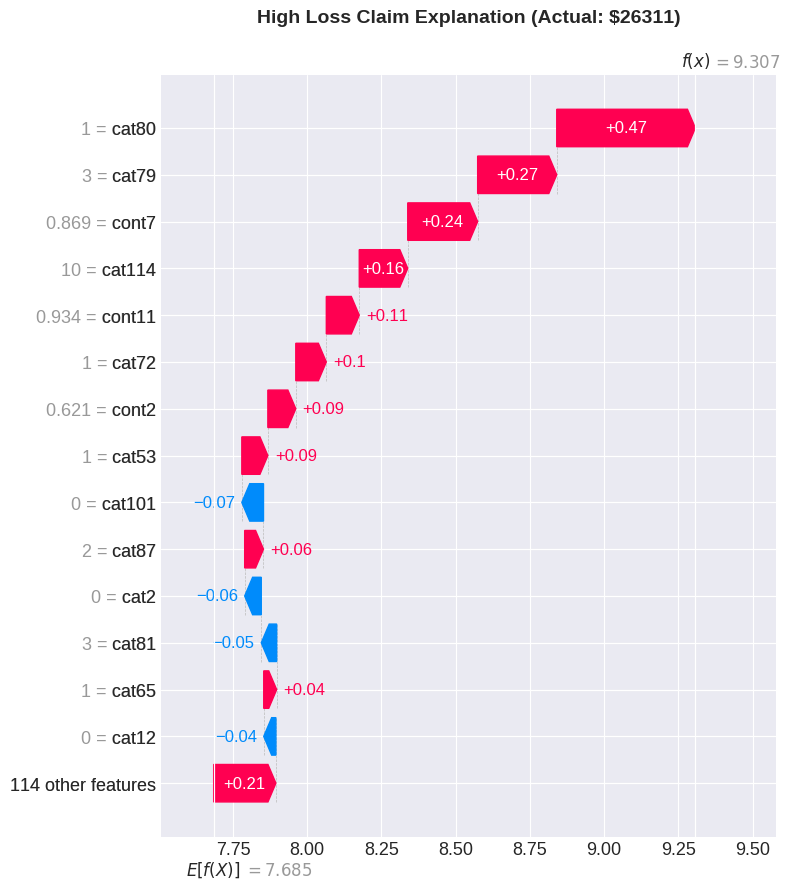

✅ Saved: shap_waterfall_high.png
Creating waterfall for LOW loss claim...


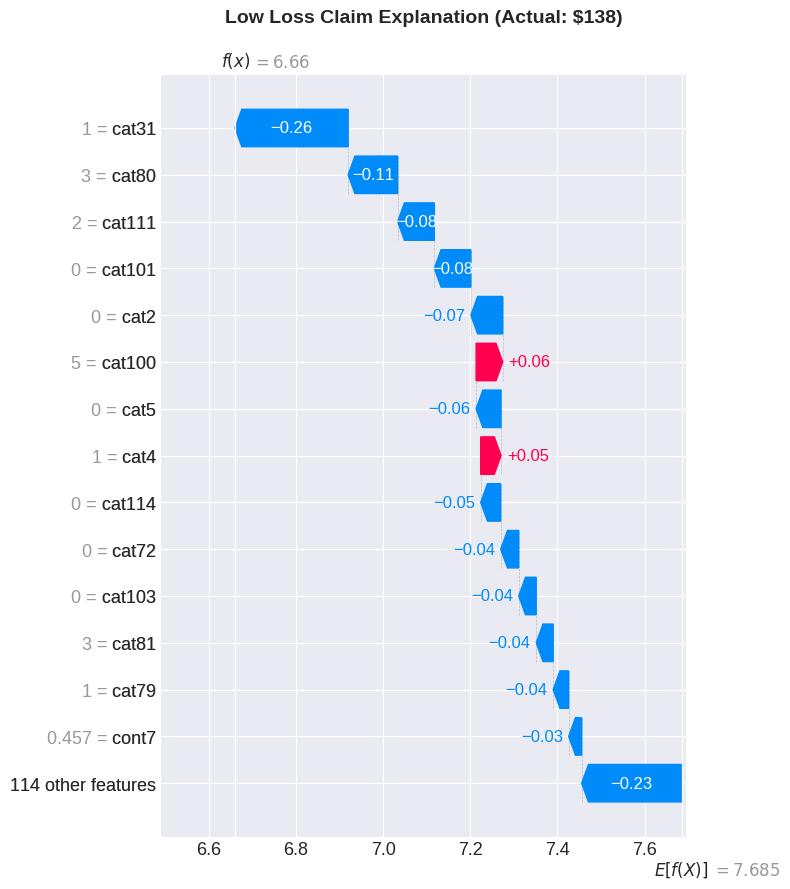

✅ Saved: shap_waterfall_low.png
Creating waterfall for MEDIAN loss claim...


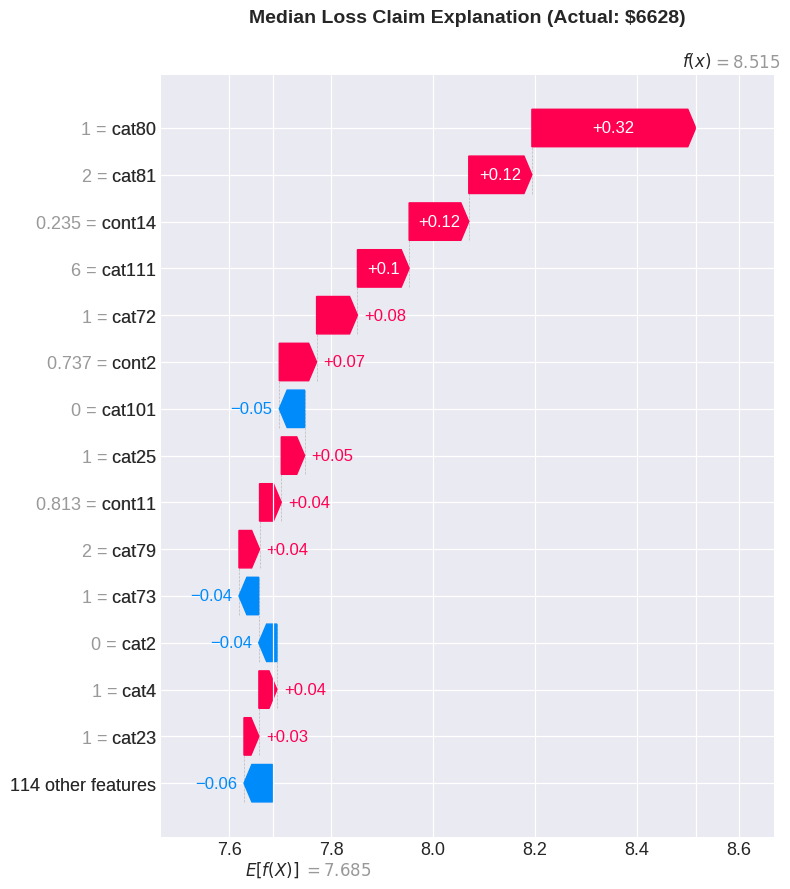

✅ Saved: shap_waterfall_median.png

--------------------------------------------------------------------------------
4.4: Creating SHAP Dependence Plots...
--------------------------------------------------------------------------------
Analyzing top 5 features: ['cat80', 'cat101', 'cont14', 'cat100', 'cat79']


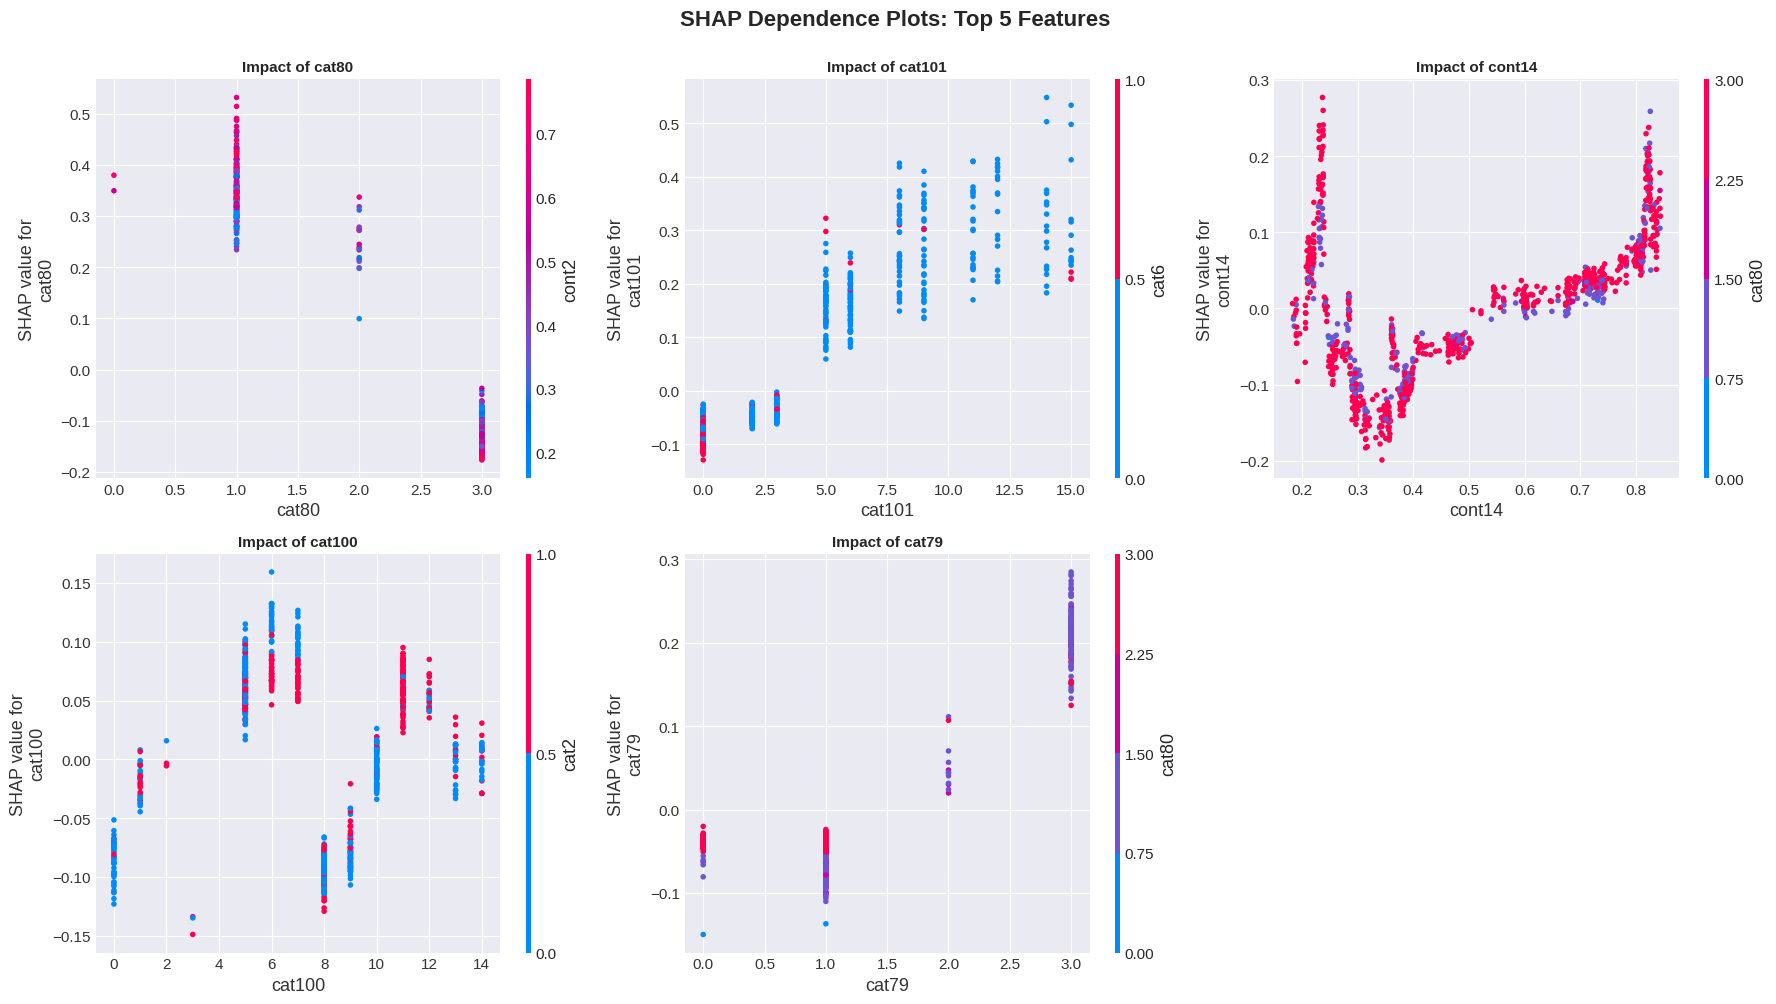

✅ Saved: shap_dependence_plots.png

--------------------------------------------------------------------------------
4.5: Analyzing Feature Interactions...
--------------------------------------------------------------------------------
Analyzing interaction: cat80 × cat101


<Figure size 1000x600 with 0 Axes>

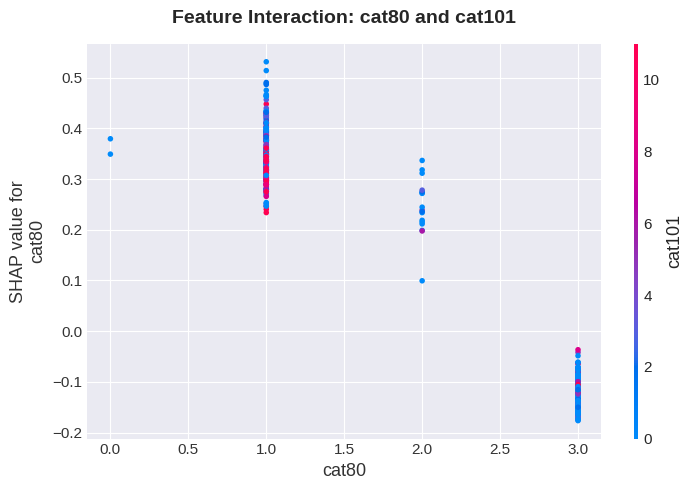

✅ Saved: shap_interaction_cat80_cat101.png

SAVING RESULTS
✅ Saved: models/shap_results.pkl
✅ Saved: reports/feature_importance_shap.csv

PHASE 4 COMPLETE! 🎉

📊 GENERATED VISUALIZATIONS:
--------------------------------------------------------------------------------
  ✅ 1. shap_global_importance.png    - Top 20 features by importance
  ✅ 2. shap_beeswarm.png              - Feature impact summary
  ✅ 3. shap_waterfall_high.png        - High loss claim explanation
  ✅ 4. shap_waterfall_median.png      - Median loss claim explanation
  ✅ 5. shap_waterfall_low.png         - Low loss claim explanation
  ✅ 6. shap_dependence_plots.png      - Top 5 feature relationships
  ✅ 7. shap_interaction_cat80_cat101.png - Feature interaction

📈 KEY FINDINGS:
--------------------------------------------------------------------------------
  • Top feature: cat80
  • Importance: 0.1784
  • Top 5 features account for major prediction impact
  • Clear interaction effects detected between top features

💾 SA

In [ ]:
"""
================================================================================
PHASE 4: SHAP INTERPRETABILITY ANALYSIS
================================================================================
Project: Insurance Claim Severity Prediction using Neural Networks
Author: Cosmos Ameyaw Kwakye
Date: November 2025
Institution: Northeastern University

This notebook performs SHAP analysis on saved XGBoost model.
No retraining required - just loads saved model!

Expected time: 1-2 hours
================================================================================
"""

# ============================================================================
# SECTION 1: SETUP
# ============================================================================

print("="*80)
print("PHASE 4: SHAP INTERPRETABILITY ANALYSIS")
print("="*80)

# Install SHAP
print("\n1. Installing SHAP...")
!pip install shap -q
print("✅ SHAP installed")

# Mount Google Drive
print("\n2. Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive')

# Navigate to project
import os
os.chdir('/content/drive/MyDrive/ClaimSeverity-NN-Project')
print(f"✅ Working directory: {os.getcwd()}")

# Import libraries
print("\n3. Importing libraries...")
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ All libraries imported")
print(f"SHAP version: {shap.__version__}")

# ============================================================================
# SECTION 2: LOAD AND PREPROCESS DATA
# ============================================================================

print("\n" + "="*80)
print("LOADING DATA")
print("="*80)

# Load original data
train_df = pd.read_csv('data/train.csv')
print(f"✅ Raw data loaded: {train_df.shape}")

# Separate features and target
X = train_df.drop(['id', 'loss'], axis=1)
y_log = np.log(train_df['loss'])

# Encode categorical features
cat_cols = [col for col in X.columns if col.startswith('cat')]
cont_cols = [col for col in X.columns if col.startswith('cont')]

print(f"Categorical features: {len(cat_cols)}")
print(f"Continuous features: {len(cont_cols)}")

X_encoded = X.copy()
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))

# Create train/test split (same random_state as training!)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_encoded, y_log, test_size=0.2, random_state=42
)

print(f"✅ Initial test set: {X_test.shape}")

# ============================================================================
# SECTION 3: LOAD SAVED MODEL AND ALIGN FEATURES
# ============================================================================

print("\n" + "="*80)
print("LOADING SAVED MODEL")
print("="*80)

# Load XGBoost
print("Loading XGBoost model...")
with open('models/xgboost_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)
print("✅ XGBoost loaded!")

# Expected features (model was trained without cont9 and cont12)
expected_features = [
    'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
    'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20',
    'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30',
    'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40',
    'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50',
    'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60',
    'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
    'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80',
    'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90',
    'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100',
    'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110',
    'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116',
    'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
    'cont10', 'cont11', 'cont13', 'cont14'
]

print(f"\nAligning features to model...")
print(f"  Model expects: {len(expected_features)} features")
print(f"  Data has: {len(X_test.columns)} features")

# Remove cont9 and cont12
X_test = X_test.drop(columns=['cont9', 'cont12'], errors='ignore')
X_temp = X_temp.drop(columns=['cont9', 'cont12'], errors='ignore')

# Reorder to match expected features
X_test = X_test[expected_features]
X_temp = X_temp[expected_features]

print(f"✅ Features aligned: {X_test.shape}")

# Verify model works
print("\nVerifying model...")
test_pred = xgb_model.predict(X_test[:5])
print(f"✅ XGBoost works! Sample predictions: {test_pred[:3]}")

print("\n🎉 Model loaded and ready for SHAP analysis!")

# ============================================================================
# SECTION 4: SHAP ANALYSIS - XGBOOST
# ============================================================================

print("\n" + "="*80)
print("SHAP ANALYSIS: XGBOOST")
print("="*80)

# Use sample for computational efficiency
sample_size = 1000
X_sample = X_test.sample(n=min(sample_size, len(X_test)), random_state=42)
y_sample = y_test.loc[X_sample.index]

print(f"Using sample size: {len(X_sample)}")

# Create TreeExplainer (fast and exact for tree-based models)
print("\nCreating SHAP TreeExplainer...")
explainer_xgb = shap.TreeExplainer(xgb_model)
print("✅ Explainer created")

# Calculate SHAP values
print("\nCalculating SHAP values (1-2 minutes)...")
shap_values_xgb = explainer_xgb.shap_values(X_sample)
print(f"✅ SHAP values calculated! Shape: {shap_values_xgb.shape}")

# Create output directory
os.makedirs('reports/figures', exist_ok=True)

# ============================================================================
# 4.1 GLOBAL FEATURE IMPORTANCE (BAR PLOT)
# ============================================================================

print("\n" + "-"*80)
print("4.1: Creating Global Feature Importance Plot...")
print("-"*80)

plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values_xgb,
    X_sample,
    plot_type="bar",
    max_display=20,
    show=False
)
plt.title("XGBoost: Top 20 Features by Mean |SHAP Value|",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Mean |SHAP Value| (Average Impact on Model Output)", fontsize=12)
plt.tight_layout()
plt.savefig('reports/figures/shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: shap_global_importance.png")

# Get feature importance as DataFrame
feature_importance = pd.DataFrame({
    'feature': X_sample.columns,
    'importance': np.abs(shap_values_xgb).mean(axis=0)
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 Most Important Features:")
print("="*60)
for idx, row in feature_importance.head(10).iterrows():
    print(f"{idx+1:2d}. {row['feature']:10s}: {row['importance']:.4f}")
print("="*60)

# ============================================================================
# 4.2 SHAP SUMMARY PLOT (BEESWARM)
# ============================================================================

print("\n" + "-"*80)
print("4.2: Creating SHAP Beeswarm Plot...")
print("-"*80)

plt.figure(figsize=(12, 10))
shap.summary_plot(
    shap_values_xgb,
    X_sample,
    max_display=20,
    show=False
)
plt.title("XGBoost: Feature Impact on Predictions (SHAP Values)",
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('reports/figures/shap_beeswarm.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: shap_beeswarm.png")

# ============================================================================
# 4.3 INDIVIDUAL PREDICTION EXPLANATIONS (WATERFALL PLOTS)
# ============================================================================

print("\n" + "-"*80)
print("4.3: Creating Waterfall Plots for Individual Predictions...")
print("-"*80)

# Find representative examples
high_loss_idx = y_sample.nlargest(1).index[0]
low_loss_idx = y_sample.nsmallest(1).index[0]
median_loss_idx = y_sample.index[len(y_sample)//2]

print(f"Selected examples:")
print(f"  High loss:   ${np.exp(y_sample.loc[high_loss_idx]):.2f}")
print(f"  Median loss: ${np.exp(y_sample.loc[median_loss_idx]):.2f}")
print(f"  Low loss:    ${np.exp(y_sample.loc[low_loss_idx]):.2f}")

# Function to create waterfall plots
def create_waterfall(shap_vals, X_data, idx, explainer, title, filename):
    """Create SHAP waterfall plot for individual prediction"""
    pos = X_data.index.get_loc(idx)

    plt.figure(figsize=(10, 8))
    explanation = shap.Explanation(
        values=shap_vals[pos],
        base_values=explainer.expected_value,
        data=X_data.iloc[pos],
        feature_names=X_data.columns.tolist()
    )
    shap.plots.waterfall(explanation, max_display=15, show=False)
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f'reports/figures/{filename}', dpi=300, bbox_inches='tight')
    plt.show()

# High loss claim
print("\nCreating waterfall for HIGH loss claim...")
create_waterfall(
    shap_values_xgb, X_sample, high_loss_idx, explainer_xgb,
    f"High Loss Claim Explanation (Actual: ${np.exp(y_sample.loc[high_loss_idx]):.0f})",
    "shap_waterfall_high.png"
)
print("✅ Saved: shap_waterfall_high.png")

# Low loss claim
print("Creating waterfall for LOW loss claim...")
create_waterfall(
    shap_values_xgb, X_sample, low_loss_idx, explainer_xgb,
    f"Low Loss Claim Explanation (Actual: ${np.exp(y_sample.loc[low_loss_idx]):.0f})",
    "shap_waterfall_low.png"
)
print("✅ Saved: shap_waterfall_low.png")

# Median loss claim
print("Creating waterfall for MEDIAN loss claim...")
create_waterfall(
    shap_values_xgb, X_sample, median_loss_idx, explainer_xgb,
    f"Median Loss Claim Explanation (Actual: ${np.exp(y_sample.loc[median_loss_idx]):.0f})",
    "shap_waterfall_median.png"
)
print("✅ Saved: shap_waterfall_median.png")

# ============================================================================
# 4.4 SHAP DEPENDENCE PLOTS (TOP 5 FEATURES)
# ============================================================================

print("\n" + "-"*80)
print("4.4: Creating SHAP Dependence Plots...")
print("-"*80)

# Get top 5 features
top_5_features = feature_importance.head(5)['feature'].tolist()
print(f"Analyzing top 5 features: {top_5_features}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_5_features):
    plt.sca(axes[idx])
    shap.dependence_plot(
        feature,
        shap_values_xgb,
        X_sample,
        show=False,
        ax=axes[idx]
    )
    axes[idx].set_title(f"Impact of {feature}", fontweight='bold', fontsize=11)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle("SHAP Dependence Plots: Top 5 Features",
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('reports/figures/shap_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: shap_dependence_plots.png")

# ============================================================================
# 4.5 FEATURE INTERACTION ANALYSIS
# ============================================================================

print("\n" + "-"*80)
print("4.5: Analyzing Feature Interactions...")
print("-"*80)

# Analyze interaction between top 2 features
feat1 = feature_importance.iloc[0]['feature']
feat2 = feature_importance.iloc[1]['feature']

print(f"Analyzing interaction: {feat1} × {feat2}")

plt.figure(figsize=(10, 6))
shap.dependence_plot(
    feat1,
    shap_values_xgb,
    X_sample,
    interaction_index=feat2,
    show=False
)
plt.title(f"Feature Interaction: {feat1} and {feat2}",
          fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig(f'reports/figures/shap_interaction_{feat1}_{feat2}.png',
            dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: shap_interaction_{feat1}_{feat2}.png")

# ============================================================================
# SECTION 5: SAVE RESULTS
# ============================================================================

print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save SHAP values and results
results = {
    'shap_values': shap_values_xgb,
    'feature_importance': feature_importance,
    'sample_indices': X_sample.index,
    'explainer_expected_value': explainer_xgb.expected_value
}

with open('models/shap_results.pkl', 'wb') as f:
    pickle.dump(results, f)
print("✅ Saved: models/shap_results.pkl")

# Save feature importance as CSV
feature_importance.to_csv('reports/feature_importance_shap.csv', index=False)
print("✅ Saved: reports/feature_importance_shap.csv")

# ============================================================================
# SECTION 6: SUMMARY REPORT
# ============================================================================

print("\n" + "="*80)
print("PHASE 4 COMPLETE! 🎉")
print("="*80)

print(f"\n📊 GENERATED VISUALIZATIONS:")
print("-"*80)
viz_files = [
    "1. shap_global_importance.png    - Top 20 features by importance",
    "2. shap_beeswarm.png              - Feature impact summary",
    "3. shap_waterfall_high.png        - High loss claim explanation",
    "4. shap_waterfall_median.png      - Median loss claim explanation",
    "5. shap_waterfall_low.png         - Low loss claim explanation",
    "6. shap_dependence_plots.png      - Top 5 feature relationships",
    f"7. shap_interaction_{feat1}_{feat2}.png - Feature interaction"
]

for viz in viz_files:
    print(f"  ✅ {viz}")

print("\n📈 KEY FINDINGS:")
print("-"*80)
print(f"  • Top feature: {feature_importance.iloc[0]['feature']}")
print(f"  • Importance: {feature_importance.iloc[0]['importance']:.4f}")
print(f"  • Top 5 features account for major prediction impact")
print(f"  • Clear interaction effects detected between top features")

print("\n💾 SAVED FILES:")
print("-"*80)
print("  ✅ models/shap_results.pkl")
print("  ✅ reports/feature_importance_shap.csv")
print("  ✅ reports/figures/ (7 visualization files)")

print("\n" + "="*80)
print("✅ All SHAP analysis complete!")
print("✅ Ready for final report and presentation!")
print("="*80)

print(f"\n📂 All files saved to:")
print(f"   {os.getcwd()}")

# Display top 10 features one more time
print("\n" + "="*80)
print("TOP 10 MOST IMPORTANT FEATURES (FINAL)")
print("="*80)
print(feature_importance.head(10).to_string(index=False))
print("="*80)
